In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/1_spam.tsv", sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [3]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.489950,59.942907,2.0,36.0,62.0,122.0,910.0
punct,5572.0,4.177495,4.623919,0.0,2.0,3.0,6.0,133.0


In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [10]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [13]:
# Let's take some random 'ham' to make the shapes equal:
ham = ham.sample(747)
ham.shape

(747, 4)

In [14]:
data = ham.append(spam, ignore_index=True)
data.shape

(1494, 4)

In [15]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

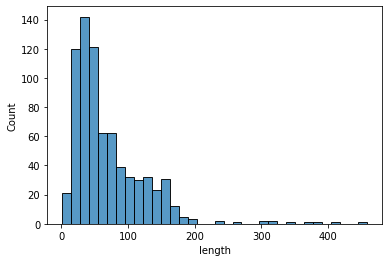

In [27]:
sns.histplot(x=data[data['label'] == 'ham']['length'], data=data)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=100, shuffle=True)

# Building the Model (Random Forest):

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [37]:
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier(n_estimators=100))])

In [38]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# Predicting the results (Random Forest):

In [52]:
y_pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [41]:
accuracy_score(y_test, y_pred)

0.9599109131403119

In [42]:
confusion_matrix(y_test, y_pred)

array([[224,   3],
       [ 15, 207]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


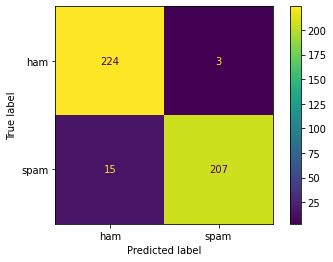

In [46]:
plot_confusion_matrix(classifier, X_test, y_test)

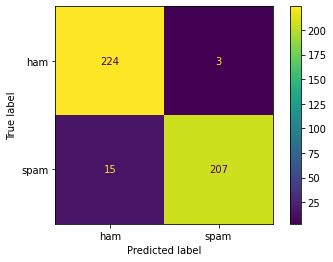

In [49]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.96       227
        spam       0.99      0.93      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# Building model (SVM):

In [53]:
from sklearn.svm import SVC

In [54]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [55]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# Predicting the results (SVM):

In [56]:
y_pred = svm.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.9510022271714922

In [58]:
confusion_matrix(y_test, y_pred)

array([[222,   5],
       [ 17, 205]])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       227
        spam       0.98      0.92      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [60]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [61]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
['ham']
['ham']
['spam']


In [62]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


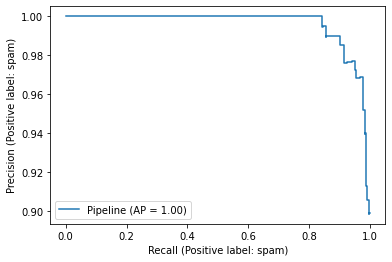

In [64]:
plot_precision_recall_curve(svm, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


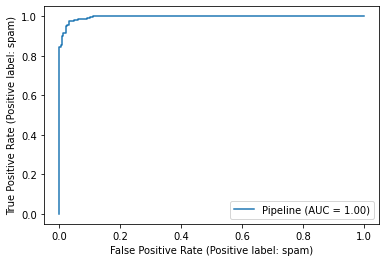

In [66]:
plot_roc_curve(svm, X_test, y_test)